C:\Users\fbuse\AppData\Local\Temp\ipykernel_31940\2030029723.py:10: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254

Decision Tree Accuracy: 0.5818181818181818
Decision Tree AUC: 0.5855437665782492
Decision Tree Sensitivity: 0.6538461538461539
Decision Tree Specificity: 0.5172413793103449
MLP Accuracy: 0.7636363636363637
MLP AUC: 0.7599469496021221
MLP Sensitivity: 0.6923076923076923
MLP Specificity: 0.8275862068965517


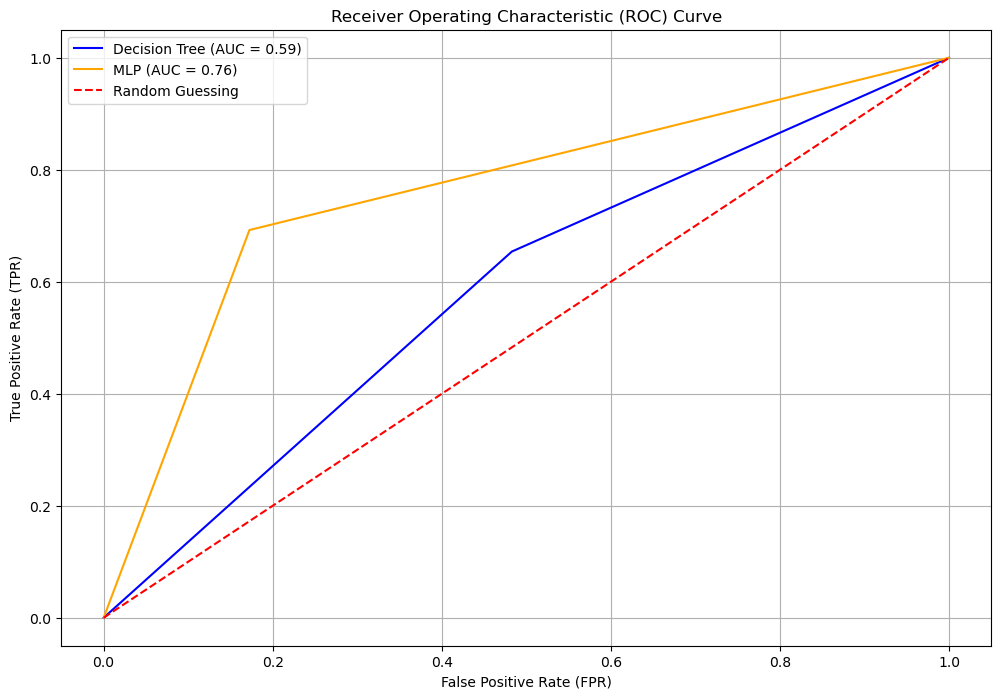

Decision Tree Accuracy: 0.5272727272727272
Decision Tree AUC: 0.5257936507936508
Decision Tree Sensitivity: 0.6071428571428571
Decision Tree Specificity: 0.4444444444444444
MLP Accuracy: 0.6909090909090909
MLP AUC: 0.6904761904761906
MLP Sensitivity: 0.7142857142857143
MLP Specificity: 0.6666666666666666


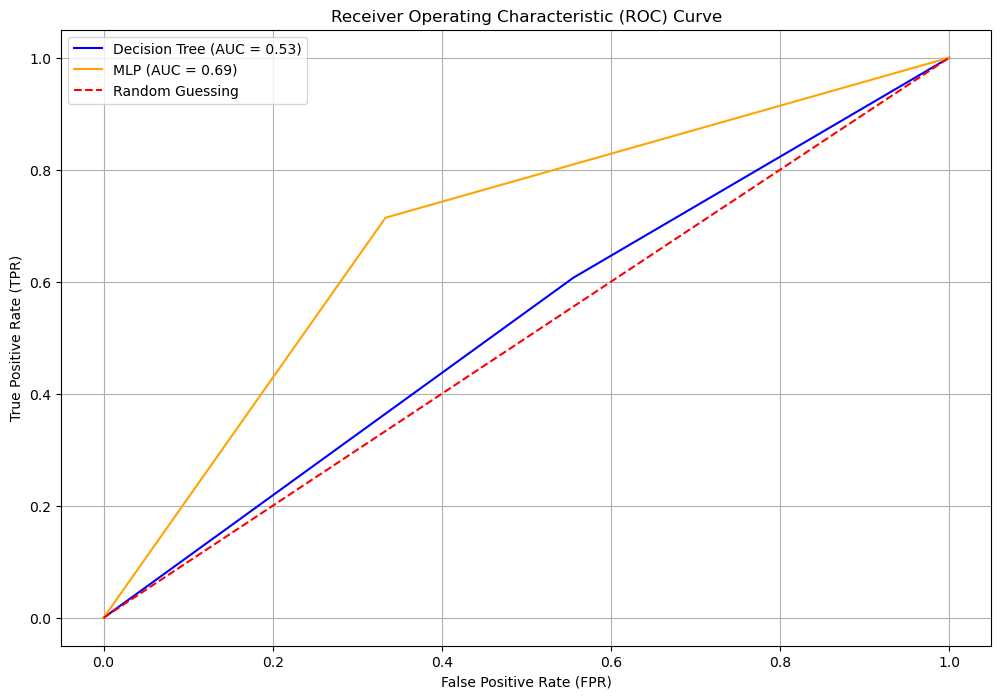

Decision Tree Accuracy: 0.6
Decision Tree AUC: 0.5998677248677249
Decision Tree Sensitivity: 0.6071428571428571
Decision Tree Specificity: 0.5925925925925926
MLP Accuracy: 0.6909090909090909
MLP AUC: 0.6917989417989417
MLP Sensitivity: 0.6428571428571429
MLP Specificity: 0.7407407407407407


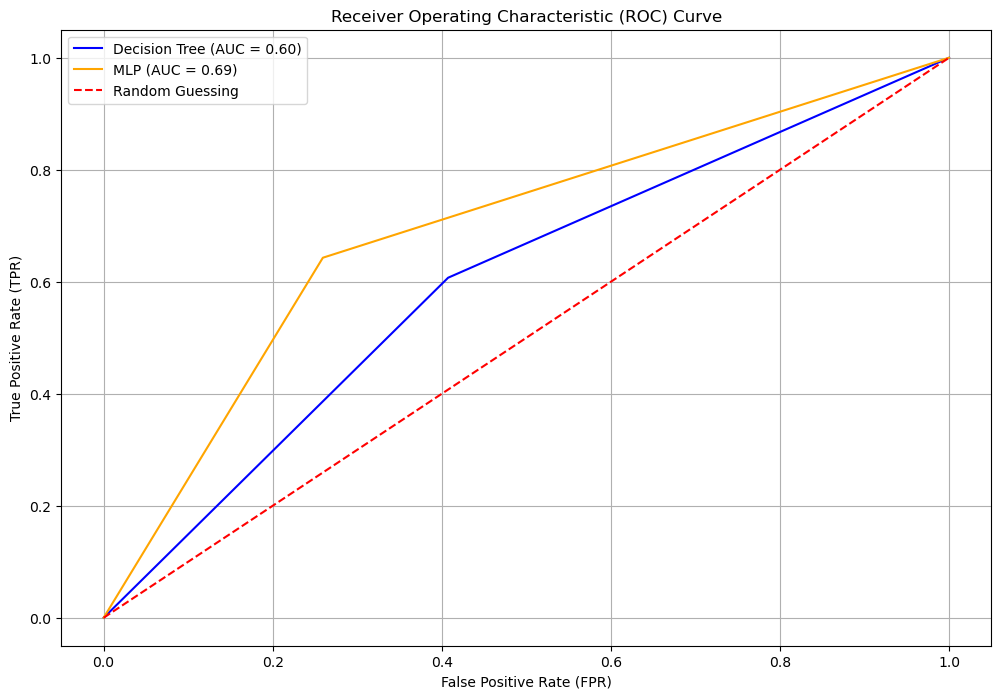

In [6]:
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv("otu.csv")
transposed_data = data.transpose()
le = LabelEncoder()
y = transposed_data.iloc[:, 0].values
encoded_y = le.fit_transform(y)
y = encoded_y.reshape(271, 1)
x = data.drop([0])
transposed_x = x.transpose()
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(transposed_x)
new_x = pd.DataFrame(scaled_x)

shuffler = ShuffleSplit(n_splits=3, train_size=0.8, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(criterion='entropy', random_state=1)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=1)

for train_index, test_index in shuffler.split(new_x, y):
    x_train, x_test = new_x.iloc[train_index], new_x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    mlp_model.fit(x_train, y_train.ravel())
    y_pred_mlp = mlp_model.predict(x_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
    fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp)
    auc_mlp = roc_auc_score(y_test, y_pred_mlp)
    tn_mlp, fp_mlp, fn_mlp, tp_mlp = confusion_matrix(y_test, y_pred_mlp).ravel()
    sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp)
    specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)

    print("Decision Tree Accuracy:", accuracy_tree)
    print("Decision Tree AUC:", auc_tree)
    print("Decision Tree Sensitivity:", sensitivity_tree)
    print("Decision Tree Specificity:", specificity_tree)

    print("MLP Accuracy:", accuracy_mlp)
    print("MLP AUC:", auc_mlp)
    print("MLP Sensitivity:", sensitivity_mlp)
    print("MLP Specificity:", specificity_mlp)

    plt.figure(figsize=(12, 8))
    plt.plot(fpr_mlp, tpr_mlp, color='orange', label='MLP (AUC = %0.2f)' % auc_mlp)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

data = pd.read_csv("otu.csv")
transposed_data = data.transpose()
le = LabelEncoder()
y = transposed_data.iloc[:, 0].values
encoded_y = le.fit_transform(y)
y = encoded_y.reshape(271, 1)
x = data.drop([0])
transposed_x = x.transpose()
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(transposed_x)
new_x = pd.DataFrame(scaled_x)



C:\Users\fbuse\AppData\Local\Temp\ipykernel_29460\3512365933.py:9: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,

In [3]:
shuffler = ShuffleSplit(n_splits=3, train_size=0.8, test_size=0.2, random_state=42)

ysa_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=1)

train_index, test_index = next(shuffler.split(new_x, y))
x_train, x_test = new_x.iloc[train_index], new_x.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]

ysa_model.fit(x_train, y_train.ravel())
y_pred_ysa = ysa_model.predict(x_test)
accuracy_ysa = accuracy_score(y_test, y_pred_ysa)
fpr_ysa, tpr_ysa, thresholds_ysa = roc_curve(y_test, y_pred_ysa)
auc_ysa = roc_auc_score(y_test, y_pred_ysa)
tn_ysa, fp_ysa, fn_ysa, tp_ysa = confusion_matrix(y_test, y_pred_ysa).ravel()
sensitivity_ysa = tp_ysa / (tp_ysa + fn_ysa)
specificity_ysa = tn_ysa / (tn_ysa + fp_ysa)

print("YSA Accuracy:", accuracy_ysa)
print("YSA AUC:", auc_ysa)
print("YSA Sensitivity:", sensitivity_ysa)
print("YSA Specificity:", specificity_ysa)


YSA Accuracy: 0.7636363636363637
YSA AUC: 0.7599469496021221
YSA Sensitivity: 0.6923076923076923
YSA Specificity: 0.8275862068965517


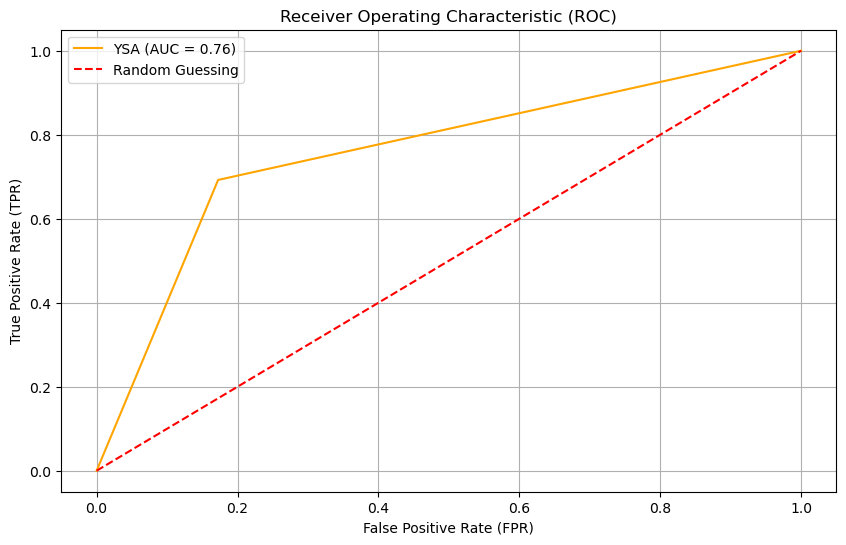

In [5]:

plt.figure(figsize=(10, 6))
plt.plot(fpr_ysa, tpr_ysa, color='orange', label='YSA (AUC = %0.2f)' % auc_ysa)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid()
plt.show()
